In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
sns.set(style = 'darkgrid')
% matplotlib inline

**Format dataset containing the volume data**

This dataset is at the county level, will need to be merged with the county field of the crash dataset that is at the municipality level

In [2]:
dir = 'C:\\Users\\Travis Park\\Documents\\Big Data Python\\New_NY\\'
r = ['1','2','3','4','5','6','7','8','9','10','11']
y = list(range(2012,2015))

In [3]:
file1 = 'CC_VOL_R1_2012\\CC_VOL_R1_2012.csv'

In [4]:
data = pd.read_csv(dir+file1)

Define column names for DataFrame

In [5]:
data = pd.DataFrame(columns = list(data.columns))
data

,RC,Station,Region,DOTID,CCID,FC,Route,Roadname,County,County FIPS,...,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24


Read all files in directory for all years and merge them into a DataFrame "data"

In [6]:
i = 0
while i <len(r):
    j = 0
    while j < len(y):
        file= dir + 'CC_VOL_R' + r[i] + '_' + str(y[j]) + '\\CC_VOL_R'+ r[i] + '_' + str(y[j]) +'.csv'
        file_df = pd.read_csv(file)
        data = data.append(file_df)
        print(file)
        j=j+1
    i=i+1

C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R1_2012\CC_VOL_R1_2012.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R1_2013\CC_VOL_R1_2013.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R1_2014\CC_VOL_R1_2014.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R2_2012\CC_VOL_R2_2012.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R2_2013\CC_VOL_R2_2013.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R2_2014\CC_VOL_R2_2014.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R3_2012\CC_VOL_R3_2012.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R3_2013\CC_VOL_R3_2013.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R3_2014\CC_VOL_R3_2014.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R4_2012\CC_VOL_R4_2012.csv
C:\Users\Travis Park\Documents\Big Data Python\New_NY\CC_VOL_R4_2013\CC_VOL_R4_2013.csv
C:\Users\Travis Park\Documents\B

In [7]:
data.head()

,RC,Station,Region,DOTID,CCID,FC,Route,Roadname,County,County FIPS,...,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24
0,11.0,137.0,1.0,100514.0,1141.0,14.0,US9,...,ALBANY,1.0,...,729.0,815.0,893.0,858.0,648.0,487.0,338.0,203.0,116.0,88.0
1,11.0,137.0,1.0,100514.0,1141.0,14.0,US9,...,ALBANY,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,137.0,1.0,100514.0,1141.0,14.0,US9,...,ALBANY,1.0,...,773.0,828.0,881.0,876.0,660.0,518.0,357.0,213.0,142.0,112.0
3,11.0,137.0,1.0,100514.0,1141.0,14.0,US9,...,ALBANY,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.0,137.0,1.0,100514.0,1141.0,14.0,US9,...,ALBANY,1.0,...,880.0,939.0,954.0,890.0,697.0,544.0,364.0,302.0,192.0,148.0


In [8]:
cols = ['RC',
 'Station',
 'Region',
 'DOTID',
 'CCID',
 'FC',
 'Route',
 'Roadname',
 'County',
 'County FIPS',
 'Begin Desc',
 'End Desc',
 'Station ID',
 'ROAD',
 'One-Way',
 'YEAR',
 'MONTH',
 'DAY',
 'DOW',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17',
 'I18',
 'I19',
 'I20',
 'I21',
 'I22',
 'I23',
 'I24']

data.columns = cols

Only include valid records

In [9]:
data = data[(data['ROAD'] == 99)]

Remove some unneeded columns

In [10]:
cols = ['Region',
 'Route',
 'County',
 'Begin Desc',
 'End Desc',
 'Station ID',
 'YEAR',
 'MONTH',
 'DAY',
 'DOW',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17',
 'I18',
 'I19',
 'I20',
 'I21',
 'I22',
 'I23',
 'I24']

data = data[cols]

In [11]:
data.head()

,Region,Route,County,Begin Desc,End Desc,Station ID,YEAR,MONTH,DAY,DOW,...,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24
0,1.0,US9,ALBANY,MAXWELL RD ...,RT 155 ...,110137.0,2012.0,2.0,1.0,4.0,...,729.0,815.0,893.0,858.0,648.0,487.0,338.0,203.0,116.0,88.0
2,1.0,US9,ALBANY,MAXWELL RD ...,RT 155 ...,110137.0,2012.0,2.0,2.0,5.0,...,773.0,828.0,881.0,876.0,660.0,518.0,357.0,213.0,142.0,112.0
4,1.0,US9,ALBANY,MAXWELL RD ...,RT 155 ...,110137.0,2012.0,2.0,3.0,6.0,...,880.0,939.0,954.0,890.0,697.0,544.0,364.0,302.0,192.0,148.0
6,1.0,US9,ALBANY,MAXWELL RD ...,RT 155 ...,110137.0,2012.0,2.0,4.0,7.0,...,762.0,802.0,754.0,602.0,529.0,357.0,254.0,224.0,168.0,163.0
8,1.0,US9,ALBANY,MAXWELL RD ...,RT 155 ...,110137.0,2012.0,2.0,5.0,1.0,...,619.0,570.0,545.0,449.0,229.0,135.0,130.0,100.0,194.0,99.0


Unpivot the data so that the there is one column "chHour" with the value for that record in it

In [12]:
l_data = pd.melt(data, id_vars = ['Region','Route','County','Begin Desc','End Desc','Station ID','YEAR','MONTH','DAY','DOW'],
       value_vars = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10','I11','I12','I13','I14','I15','I16','I17','I18','I19','I20','I21','I22','I23','I24'],
       var_name = 'chHour',value_name = 'Volume')

In [13]:
l_data['iHour'] = l_data['chHour'].str[1:]
l_data['iHour'] = l_data['iHour'].astype(float)
l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842760 entries, 0 to 3842759
Data columns (total 13 columns):
Region        float64
Route         object
County        object
Begin Desc    object
End Desc      object
Station ID    float64
YEAR          float64
MONTH         float64
DAY           float64
DOW           float64
chHour        object
Volume        float64
iHour         float64
dtypes: float64(8), object(5)
memory usage: 381.1+ MB


In [14]:
p_data = pd.pivot_table(l_data, values = 'Volume',
                     index = ['Region','County','YEAR','MONTH','DAY','iHour'], aggfunc = np.mean)
p_data = pd.DataFrame(p_data)
p_data.reset_index(inplace = True)
print(p_data.shape)
p_data.head()

(1466712, 7)


,Region,County,YEAR,MONTH,DAY,iHour,Volume
0,1.0,ALBANY,2012.0,2.0,1.0,1.0,49.0
1,1.0,ALBANY,2012.0,2.0,1.0,2.0,19.0
2,1.0,ALBANY,2012.0,2.0,1.0,3.0,17.0
3,1.0,ALBANY,2012.0,2.0,1.0,4.0,9.0
4,1.0,ALBANY,2012.0,2.0,1.0,5.0,25.0


Clean County field

In [15]:
p_data['CountyTrim'] = p_data['County'].str.strip()
p_data.head()

,Region,County,YEAR,MONTH,DAY,iHour,Volume,CountyTrim
0,1.0,ALBANY,2012.0,2.0,1.0,1.0,49.0,ALBANY
1,1.0,ALBANY,2012.0,2.0,1.0,2.0,19.0,ALBANY
2,1.0,ALBANY,2012.0,2.0,1.0,3.0,17.0,ALBANY
3,1.0,ALBANY,2012.0,2.0,1.0,4.0,9.0,ALBANY
4,1.0,ALBANY,2012.0,2.0,1.0,5.0,25.0,ALBANY


In [16]:
#p_data.to_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Big Data\\Project\\Big Data Analytics\\AllRegions2012-2014Hours.csv')

**Format crash dataset**

In [17]:
crash = pd.read_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Big Data\\Project\\Big Data Analytics\\ny2012-2014.csv')

In [18]:
crash.head()

,Time,Date,Hour,Year,Month,Day,Day.of.Week,Lighting.Conditions,Municipality,County.Name,Weather.Conditions,Road.Surface.Conditions,Event.Descriptor,Number.of.Vehicles.Involved,number.of.accidents
0,15:15,10/20/2013,15,2013,10,20,Sunday,Daylight,BRONX,BRONX,Clear,Dry,Pedestrian,1,1
1,18:00,4/14/2013,18,2013,4,14,Sunday,Unknown,KINGS,KINGS,Unknown,Unknown,Motor Vehicle,2,1
2,18:23,11/10/2012,18,2012,11,10,Saturday,Dark-Road Unlighted,ROME,ONEIDA,Cloudy,Dry,Animal,1,1
3,22:21,6/14/2013,22,2013,6,14,Friday,Dark-Road Unlighted,SCOTT,CORTLAND,Clear,Dry,Animal,1,1
4,18:25,9/16/2012,18,2012,9,16,Sunday,Dusk,LIVONIA,LIVINGSTON,Clear,Dry,Animal,1,1


In [19]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899013 entries, 0 to 899012
Data columns (total 15 columns):
Time                           896803 non-null object
Date                           899013 non-null object
Hour                           899013 non-null int64
Year                           899013 non-null int64
Month                          899013 non-null int64
Day                            899013 non-null int64
Day.of.Week                    899013 non-null object
Lighting.Conditions            899013 non-null object
Municipality                   886870 non-null object
County.Name                    899013 non-null object
Weather.Conditions             899013 non-null object
Road.Surface.Conditions        899013 non-null object
Event.Descriptor               899002 non-null object
Number.of.Vehicles.Involved    899013 non-null int64
number.of.accidents            899013 non-null int64
dtypes: int64(6), object(9)
memory usage: 102.9+ MB


Pivot crash dataset so that it displays the number of accidents and vehicles involved per Municipality per hour, per month, per day of week, per weather condidtion, per road condition

In [20]:
p_crash = pd.pivot_table(crash, values = ['number.of.accidents','Number.of.Vehicles.Involved'],
                     index = ['County.Name','Municipality','Date','Year','Month','Day','Day.of.Week','Hour','Weather.Conditions','Road.Surface.Conditions'], aggfunc = np.sum)

print(p_crash.shape)

(737437, 2)


In [21]:
p_crash = pd.DataFrame(p_crash)
p_crash.reset_index(inplace = True)
p_crash.head(10)

,County.Name,Municipality,Date,Year,Month,Day,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions,Number.of.Vehicles.Involved,number.of.accidents
0,ALBANY,ALBANY,1/1/2012,2012,1,1,Sunday,0,Clear,Dry,3,1
1,ALBANY,ALBANY,1/1/2012,2012,1,1,Sunday,1,Cloudy,Wet,2,1
2,ALBANY,ALBANY,1/1/2012,2012,1,1,Sunday,15,Clear,Dry,2,1
3,ALBANY,ALBANY,1/1/2012,2012,1,1,Sunday,16,Cloudy,Dry,2,1
4,ALBANY,ALBANY,1/1/2012,2012,1,1,Sunday,23,Rain,Wet,2,1
5,ALBANY,ALBANY,1/1/2013,2013,1,1,Tuesday,2,Clear,Wet,2,1
6,ALBANY,ALBANY,1/1/2013,2013,1,1,Tuesday,4,Snow,Wet,2,1
7,ALBANY,ALBANY,1/1/2013,2013,1,1,Tuesday,9,Cloudy,Snow/Ice,2,1
8,ALBANY,ALBANY,1/1/2013,2013,1,1,Tuesday,10,Cloudy,Dry,2,1
9,ALBANY,ALBANY,1/1/2013,2013,1,1,Tuesday,12,Clear,Wet,2,1


Merge dataset so that we have a final table with crash attributes and traffic volume for that county at the time of the accident

In [22]:
merge = pd.merge(p_crash,p_data, how = 'left',left_on = ['County.Name','Year','Month','Day','Hour'], right_on = ['CountyTrim','YEAR','MONTH','DAY','iHour'])
merge.columns

Index(['County.Name', 'Municipality', 'Date', 'Year', 'Month', 'Day',
       'Day.of.Week', 'Hour', 'Weather.Conditions', 'Road.Surface.Conditions',
       'Number.of.Vehicles.Involved', 'number.of.accidents', 'Region',
       'County', 'YEAR', 'MONTH', 'DAY', 'iHour', 'Volume', 'CountyTrim'],
      dtype='object')

In [23]:
#merge.to_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Big Data\\Project\\Big Data Analytics\\Merged.csv')

Clean the merged dataset

In [24]:
clean = merge[(merge['Region'] > 0) & (merge['Volume'] > 0)]
clean.reset_index(inplace = True)
clean = clean[['Region','County.Name', 'Municipality', 'Date', 'Year', 'Month', 'Day',
       'Day.of.Week', 'Hour', 'Weather.Conditions', 'Road.Surface.Conditions',
       'Number.of.Vehicles.Involved', 'number.of.accidents','Volume']]

In [25]:
clean.head()

,Region,County.Name,Municipality,Date,Year,Month,Day,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions,Number.of.Vehicles.Involved,number.of.accidents,Volume
0,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,2,Cloudy,Wet,2,1,102.5
1,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,7,Cloudy,Wet,1,1,43.0
2,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Clear,Dry,2,1,203.0
3,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Cloudy,Wet,2,1,203.0
4,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,12,Clear,Dry,2,1,536.5


Calculate accident density (accidents/volume) and vehicle density (vehicles involved/volume)

In [26]:
clean['VehDensity'] = clean['Number.of.Vehicles.Involved']/clean['Volume']
clean['AccDensity'] = clean['number.of.accidents']/clean['Volume']
clean = clean[(clean['AccDensity'] < 0.5)]
clean.head()

,Region,County.Name,Municipality,Date,Year,Month,Day,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions,Number.of.Vehicles.Involved,number.of.accidents,Volume,VehDensity,AccDensity
0,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,2,Cloudy,Wet,2,1,102.5,0.019512,0.009756
1,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,7,Cloudy,Wet,1,1,43.0,0.023256,0.023256
2,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Clear,Dry,2,1,203.0,0.009852,0.004926
3,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Cloudy,Wet,2,1,203.0,0.009852,0.004926
4,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,12,Clear,Dry,2,1,536.5,0.003728,0.001864


In [27]:
clean = clean[clean['Weather.Conditions'] != 'Unknown']
clean.head()

,Region,County.Name,Municipality,Date,Year,Month,Day,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions,Number.of.Vehicles.Involved,number.of.accidents,Volume,VehDensity,AccDensity
0,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,2,Cloudy,Wet,2,1,102.5,0.019512,0.009756
1,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,7,Cloudy,Wet,1,1,43.0,0.023256,0.023256
2,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Clear,Dry,2,1,203.0,0.009852,0.004926
3,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Cloudy,Wet,2,1,203.0,0.009852,0.004926
4,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,12,Clear,Dry,2,1,536.5,0.003728,0.001864


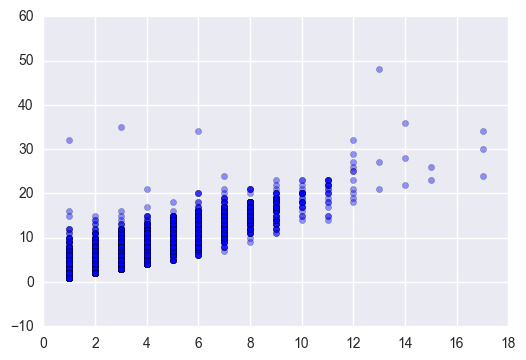

In [28]:
plt.scatter(clean['number.of.accidents'],clean['Number.of.Vehicles.Involved'],alpha = 0.4,label="Data")

In [29]:
#clean.to_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Big Data\\Project\\Big Data Analytics\\Clean.csv')

There are 1195 distinct Municipalities that are measured in the model

In [30]:
len(set(clean['Municipality']))

1195

**Machine Learning model building and evaluation**

Methodology:
  Because traffic volume is such an important aspect of accident density, we will employ three steps in predicting the number of accidents.
  
  Step 1:  Use machine learning to predict the volume of traffic for the given parameters
  
  Step 2:  Add that value to the training data and then use the new dataset to predict accident density
  
  Step 3:  Multiply accident density by volume to return the number of accidents

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.metrics import *
from sklearn.preprocessing import minmax_scale
from sklearn.svm import SVC

Convert categorical variables to integers for models to understand

In [32]:
X = clean[['County.Name','Month','Day.of.Week','Hour','Weather.Conditions','Road.Surface.Conditions']]
y = clean[['Volume']]

le = preprocessing.LabelEncoder()
le.fit(list(set(X['County.Name'])))
X['County.Name'] = le.transform(X['County.Name'])

le2 = preprocessing.LabelEncoder()
le2.fit(list(set(X['Day.of.Week'])))
X['Day.of.Week'] = le2.transform(X['Day.of.Week'])

le3 = preprocessing.LabelEncoder()
le3.fit(list(set(X['Weather.Conditions'])))
X['Weather.Conditions'] = le3.transform(X['Weather.Conditions'])

le4 = preprocessing.LabelEncoder()
le4.fit(list(set(X['Road.Surface.Conditions'])))
X['Road.Surface.Conditions'] = le4.transform(X['Road.Surface.Conditions'])

X.head()

,County.Name,Month,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions
0,0,1,6,2,1,8
1,0,1,6,7,1,8
2,0,1,6,10,0,0
3,0,1,6,10,1,8
4,0,1,6,12,0,0


In [33]:
#X.to_csv('test.csv')
#y.to_csv('testy.csv')

In [34]:
m_eval = pd.DataFrame(columns = ['Model','Train Score','Test Score'])
def addeval(method, train, test):
    global m_eval
    d = pd.DataFrame([[method, train, test]],columns = ['Model','Train Score','Test Score'])
    m_eval = m_eval.append(d)

Split data into training and testing set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
len(X_train), len(X_test)

(401660, 197833)

Because we are trying to predict a continuous number, we will employ regressors

The score indicates the r-squared score of the true values and predicted values

In [37]:
etr = ExtraTreesRegressor(n_estimators=50, max_depth = 20, random_state = 0)
etr.fit(X_train, y_train)
y_etr = etr.predict(X_test)
etr.score(X_train,y_train), etr.score(X_test, y_test),etr.score(X_train,y_train)-etr.score(X_test,y_test)

(0.93346943753791201, 0.90944954370520414, 0.024019893832707861)

In [38]:
addeval('Extra Trees',etr.score(X_train,y_train), etr.score(X_test, y_test))

In [39]:
rfg = RandomForestRegressor(max_depth=18,n_estimators=50,
                                                 random_state=0)
rfg.fit(X_train, y_train)
y_rfg = rfg.predict(X_test)
rfg.score(X_train,y_train), rfg.score(X_test, y_test),rfg.score(X_train,y_train)-rfg.score(X_test,y_test)

(0.93018577277526659, 0.91052996069349967, 0.019655812081766921)

In [40]:
addeval('Rand Forest',rfg.score(X_train,y_train), rfg.score(X_test, y_test))

In [41]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
knn.score(X_train,y_train), knn.score(X_test, y_test),knn.score(X_train,y_train)-knn.score(X_test,y_test)

(0.84616058560993712, 0.81150140924623448, 0.034659176363702637)

In [42]:
addeval('KN Neighbors',knn.score(X_train,y_train), knn.score(X_test, y_test))

In [43]:
m_eval

,Model,Train Score,Test Score
0,Extra Trees,0.933469,0.909450
0,Rand Forest,0.930186,0.910530
0,KN Neighbors,0.846161,0.811501


The chart below indicates that the Extra Trees Regressor has the best trainging score by a slight margin

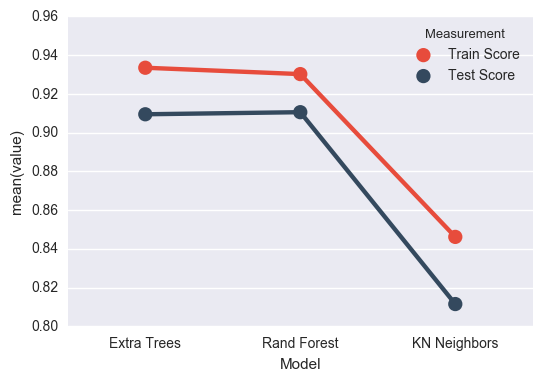

In [44]:
mm_eval = pd.melt(m_eval[['Model','Train Score','Test Score']], "Model", var_name="Measurement")

flatui = ["#e74c3c","#34495e"]

p = sns.pointplot(x="Model", y="value", hue="Measurement", data=mm_eval, palette = flatui)
labs = list(m_eval['Model'])
p.set_xticklabels(labs);

pf = p.get_figure()
pf.savefig("model eval.png", dpi = 1200)

In [45]:
g = pd.DataFrame(X_test)
g['Volume'] = y_test
g['Extra Trees'] = y_etr
g['Rand Forest'] = y_rfg
g['KN Neighbors'] = y_knn

The violinplots compare the distribution of predictions for the models with the actual volume

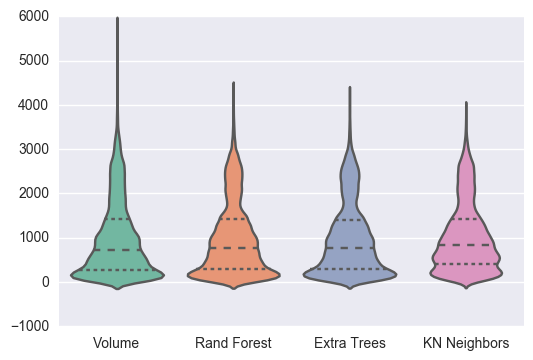

In [46]:
p = sns.violinplot(data=g[['Volume','Rand Forest','Extra Trees','KN Neighbors']] ,inner = 'quartile', palette = 'Set2');
pf = p.get_figure()
#pf.savefig("model dist.png", dpi = 1200)

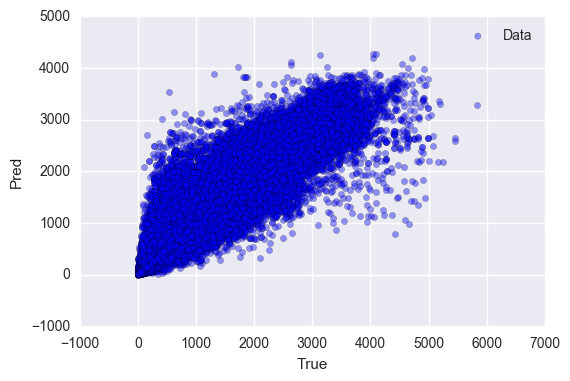

In [47]:
plt.scatter(y_test,y_etr,alpha = 0.4,label="Data")
#plt.xlim([-6, 6])
#plt.ylim([-6, 6])
plt.xlabel("True")
plt.ylabel("Pred")

plt.legend()
plt.show()

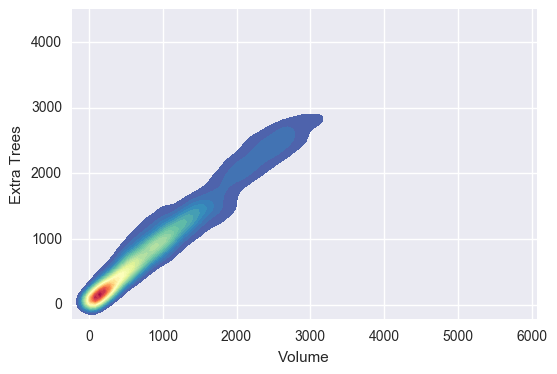

In [48]:
p = sns.kdeplot(g['Volume'], g['Extra Trees'],cmap = 'Spectral_r',
            shade=True, shade_lowest=False,size = 10, aspect = 'equal', n_levels = 50);

pf = p.get_figure()
#pf.savefig("density.png", dpi = 200)

In [49]:
etrees = etr.predict(X)
X['etrees'] = etrees

**Step 2**

The distribution of accident density is very skewed, this will affected a model's quality

To solve this we multiply each value by the natural log, this will stretch the data out and make it easier to predict

You can see the difference in the two violinplots below

We will need to recompress the predicted output for the values to be meaningful

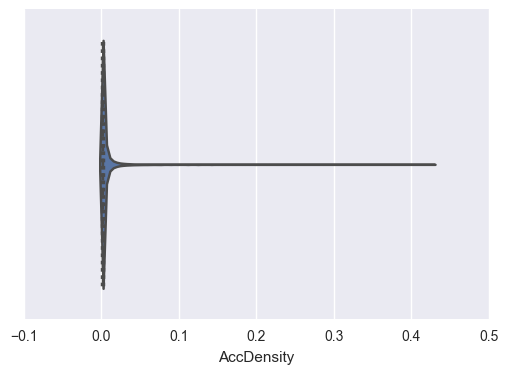

In [50]:
sns.violinplot(clean['AccDensity'], inner = 'quartile')

In [51]:
y = np.log(clean['AccDensity'])

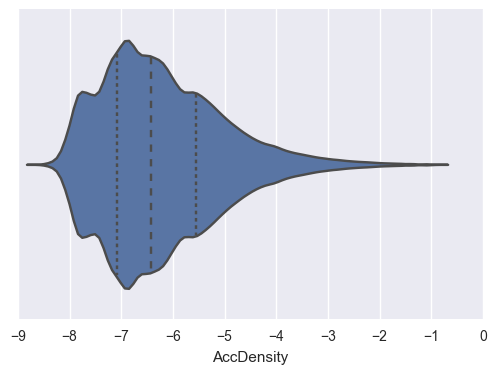

In [52]:
sns.violinplot(y, inner = 'quartile')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Initialize a new Extra Trees Regressor to predict the unskewed accident data

In [54]:
etr2 = ExtraTreesRegressor(n_estimators=50, max_depth = 10, random_state = 0)
etr2.fit(X_train, y_train)
y_etr = etr2.predict(X_test)
etr2.score(X_train,y_train), etr2.score(X_test, y_test),etr2.score(X_train,y_train)-etr2.score(X_test,y_test)

(0.90773322926272693, 0.87660324189315586, 0.031129987369571066)

In [55]:
test = pd.DataFrame(y_test)
test['Pred'] = y_etr
test.head()

,AccDensity,Pred
337943,-6.361590,-6.243620
467523,-7.818832,-7.501806
116900,-3.956040,-3.578105
323326,-2.564949,-3.296644
92035,-7.063904,-6.940038


The jointplot below demonstrates the correlation between the true values and predicted values

A perfect model would have a slope of with a pearsonr = 1, ours is reasonably close with a score of .8795

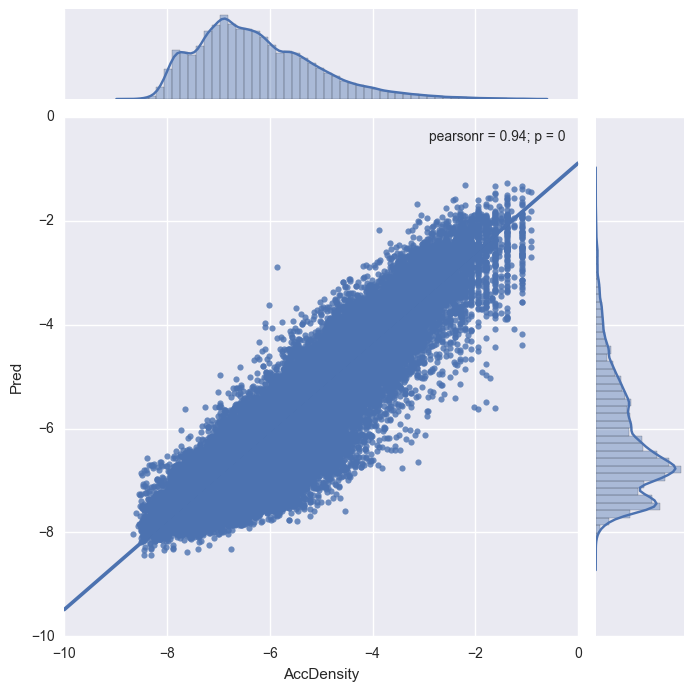

In [56]:
#plt.scatter(y_test,y_etr,alpha = 0.4,label="Data")
sns.jointplot(x = 'AccDensity',y = 'Pred', data = test, kind="reg", size=7)

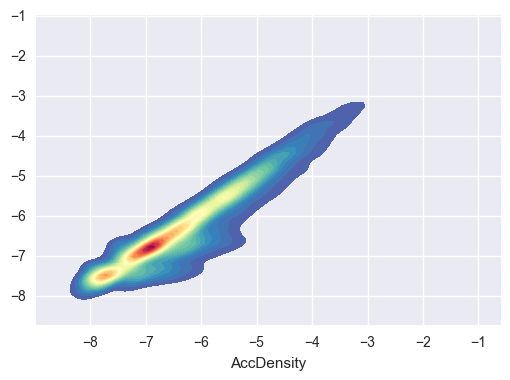

In [57]:
p = sns.kdeplot(y_test, y_etr,cmap = 'Spectral_r',
            shade=True, shade_lowest=False,size = 10, aspect = 'equal', n_levels = 50);

pf = p.get_figure()
#pf.savefig("density.png", dpi = 200)

In [58]:
etrees2 = etr2.predict(X)

In [59]:
clean['p_vol'] = etrees
clean['p_accdensity'] = etrees2
clean.head(5)

,Region,County.Name,Municipality,Date,Year,Month,Day,Day.of.Week,Hour,Weather.Conditions,Road.Surface.Conditions,Number.of.Vehicles.Involved,number.of.accidents,Volume,VehDensity,AccDensity,p_vol,p_accdensity
0,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,2,Cloudy,Wet,2,1,102.5,0.019512,0.009756,79.555000,-4.304149
1,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,7,Cloudy,Wet,1,1,43.0,0.023256,0.023256,62.015667,-3.955907
2,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Clear,Dry,2,1,203.0,0.009852,0.004926,674.597930,-6.424142
3,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,10,Cloudy,Wet,2,1,203.0,0.009852,0.004926,264.921667,-5.500716
4,1.0,ALBANY,ALBANY,1/1/2014,2014,1,1,Wednesday,12,Clear,Dry,2,1,536.5,0.003728,0.001864,689.101232,-6.433639


'up_accdensity' is the re-compressed predictin for accident density

In [60]:
clean['up_accdensity'] = np.exp(clean['p_accdensity'])
test = clean[['AccDensity','up_accdensity']]
test['AccDensity'] = np.log(test['AccDensity'])
test['up_accdensity'] = np.log(test['up_accdensity'])

The two violinplots below show the distribution of predicted values compared to the true values

It is not as close as the volume predictions because one of the fields is a predicted value in and of itself which will lower the integrity of the training data

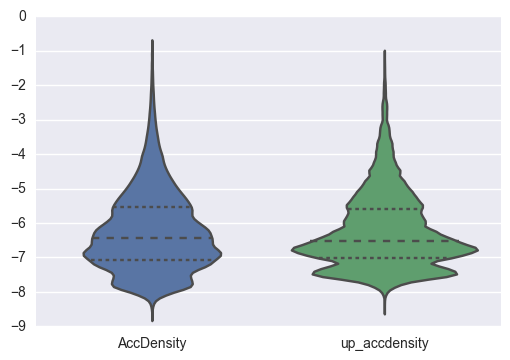

In [61]:
sns.violinplot(test, inner = 'quartile')

**Step Three**

Multiply the accident volume by the projected accident density to return the projected number of accidents

In [62]:
clean['proj_acc'] = (clean['p_vol'] * clean['up_accdensity']).round(0)
clean['proj_acc_scale'] = minmax_scale(clean['proj_acc'],feature_range=(clean['number.of.accidents'].min(),clean['number.of.accidents'].max()))
clean['proj_acc_scale'] = clean['proj_acc_scale'].round(0)
clean['proj_acc_scale'] = clean['proj_acc_scale'].astype(int)

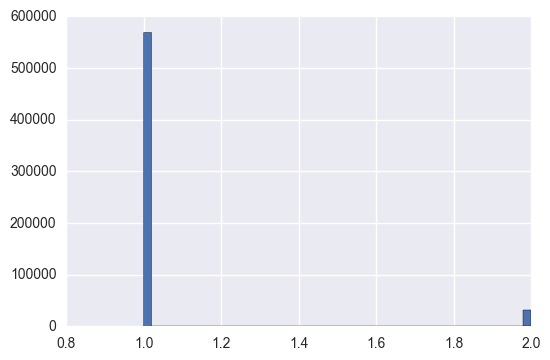

In [63]:
plt.hist(clean['proj_acc'], bins=50);

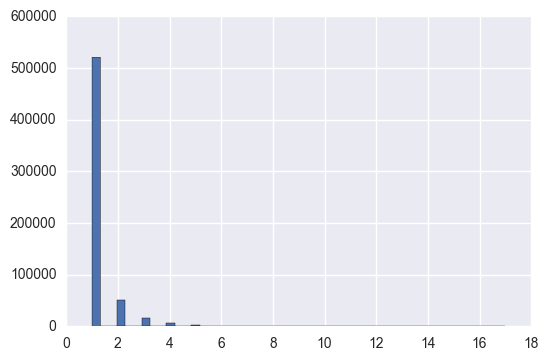

In [64]:
plt.hist(clean['number.of.accidents'], bins=50);

To overcome this issue, we will bin the inputs and use a classifier to predict which bin the number of accidents will fall in

The model is very effective when there are only two bins, but it does not help a manager if there will be either 1 or any other number accidents for that hour

Accuracy declines when more bins are included but it is more helpful to the business case, so we will use 3 bins:

1 accident per hour, 2-4 accidents per hour, or more than 4 accidents per hour

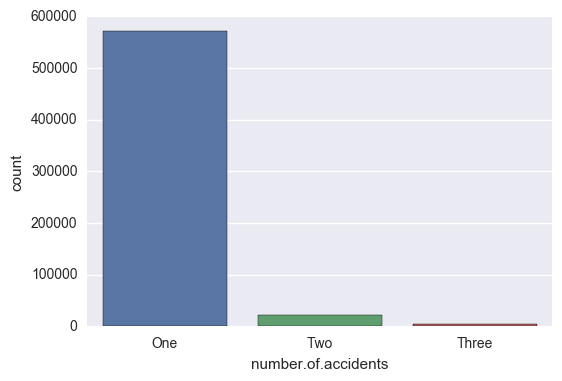

In [65]:
bins = [0,2,4,100000]
group_names = ['One','Two', 'Three']
categories = pd.cut(clean['number.of.accidents'], bins, labels = group_names)
cat = categories.to_string
sns.countplot(categories)

In [66]:
y1 = list(categories)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=42)

Because the data is very overweight in favor of single accidents, we need to account for this in our model

By assigning 'balanced' to the class_weight input the algorithm will automatically account for the imbalances

In [68]:
etc = ExtraTreesClassifier(n_estimators=50, max_depth = 25, random_state = 0, class_weight = 'balanced')
etc.fit(X_train, y_train)
y_etc = etc.predict(X_test)
etc.score(X_train,y_train), etc.score(X_test, y_test),etc.score(X_train,y_train)-etc.score(X_test,y_test)

(0.8399367624358911, 0.82034847573458425, 0.019588286701306856)

In [69]:
y2 = etc.predict(X)

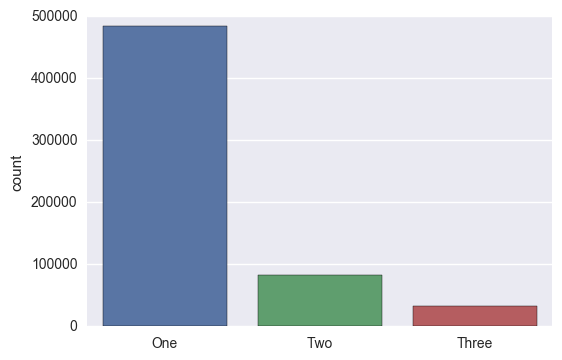

In [70]:
sns.countplot(y2)

In [71]:
clean['bin'] = y1
clean['p_bin'] = y2

In [72]:
confusion_matrix(clean['bin'], clean['p_bin'])

array([[481730,  22888,  67900],
       [   310,   4019,    665],
       [  2658,   5411,  13912]])

In [73]:
recall_score(clean['bin'], clean['p_bin'], average = None)

array([ 0.84142333,  0.80476572,  0.63291024])

In [74]:
def calc_crrct(df):
    if df['bin'] == df['p_bin']:
        return 1
    else:
        return 0

In [75]:
clean['correct'] = clean.apply(calc_crrct, axis = 1)

In [76]:
weather = pd.pivot_table(clean, index = 'Weather.Conditions', values = 'correct', aggfunc = 'count')
weather

Weather.Conditions
Clear                       329733
Cloudy                      166437
Fog/Smog/Smoke                2745
Not Entered                      8
Other*                         444
Rain                         58671
Sleet/Hail/Freezing Rain      5621
Snow                         35834
Name: correct, dtype: int64

In [77]:
weather2 = pd.pivot_table(clean, index = 'Weather.Conditions', values = 'correct', aggfunc = np.mean)
weather2

Weather.Conditions
Clear                       0.755848
Cloudy                      0.944273
Fog/Smog/Smoke              0.994900
Not Entered                 1.000000
Other*                      0.997748
Rain                        0.886469
Sleet/Hail/Freezing Rain    0.973136
Snow                        0.910002
Name: correct, dtype: float64

In [78]:
cond = list(clean['Weather.Conditions'].unique())

for i in cond:
    temp = clean[clean['Weather.Conditions'] == i]
    r =  recall_score(temp['bin'], temp['p_bin'], average = None)
    print(i, " - Recall:", r, " - Number of Records:", len(temp))
    print(confusion_matrix(temp['bin'], temp['p_bin']))

Cloudy  - Recall: [ 0.94701991  0.69354839  0.71752022]  - Number of Records: 166437
[[155745    828   7885]
 [    24     86     14]
 [   471     53   1331]]
Clear  - Recall: [ 0.76250513  0.82489775  0.61456817]  - Number of Records: 329733
[[235868  19815  53650]
 [   111   3227    574]
 [  1324   5031  10133]]
Snow  - Recall: [ 0.91823499  0.71794872  0.68455744]  - Number of Records: 35834
[[31714   627  2197]
 [   49   168    17]
 [  255    80   727]]
Rain  - Recall: [ 0.89798198  0.73925501  0.66963203]  - Number of Records: 58671
[[49838  1584  4078]
 [  124   516    58]
 [  576   241  1656]]
Sleet/Hail/Freezing Rain  - Recall: [ 0.97947693  0.84        0.62222222]  - Number of Records: 5621
[[5393   34   79]
 [   2   21    2]
 [  28    6   56]]
Fog/Smog/Smoke  - Recall: [ 0.99597365  1.          0.75      ]  - Number of Records: 2745
[[2721    0   11]
 [   0    1    0]
 [   3    0    9]]
Other*  - Recall: [ 1.  0.]  - Number of Records: 444
[[443   0]
 [  1   0]]
Not Entered  -